# Morpheus Demonstration

# Preliminaries

## Imports

In [1]:
import os
import sys
import networkx as nx
import numpy as np
import pprint
pp = pprint.PrettyPrinter(indent=4)


from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = dirname(os.getcwd())
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus
from morpheus import Morpheus
from morpheus.tests import (
    default_dataset,
    default_m_list_for_mercs,
    random_m_list_for_mercs,
)

# Visuals
from morpheus.graph import to_dot

# Ipython things
from IPython.display import Image, display, SVG
from IPython.core.display import HTML

import matplotlib as mpl
import matplotlib.pyplot as plt

## Methods

## General Constants

In [2]:
random_state=800

# Initialize

In [3]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mi',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

## Inspection

Let us investigate what is now in such a Morpheus model.

In [4]:
pp.pprint(m.configuration)

{   'classification': {   'class_weight': None,
                          'criterion': 'entropy',
                          'max_depth': 15,
                          'max_features': None,
                          'max_leaf_nodes': None,
                          'min_impurity_decrease': 0.0,
                          'min_impurity_split': None,
                          'min_samples_leaf': 1,
                          'min_samples_split': 2,
                          'min_weight_fraction_leaf': 0.0,
                          'presort': False,
                          'random_state': 800,
                          'splitter': 'best'},
    'inference': {},
    'prediction': {'random_state': 800},
    'regression': {   'criterion': 'mae',
                      'max_depth': 25,
                      'max_features': None,
                      'max_leaf_nodes': None,
                      'min_impurity_decrease': 0.0,
                      'min_impurity_split': None,
                    

# Training

In [5]:
df_train, df_test = default_dataset()
df_train.head()

,0,1,2,3,4,5,6,y
0,0.157326,-1.139498,-3.413978,0.450054,0.955829,0.131576,-0.421599,0
1,-2.415292,-3.886052,-0.958055,0.320644,0.583524,0.346293,0.162183,1
2,-2.182962,-2.658076,-3.260118,0.603738,-0.094709,-0.884652,1.249092,1
3,-0.693264,4.014894,2.754989,5.113562,4.314176,2.977437,-0.004439,1
4,-0.449253,1.783561,-0.830222,1.902207,1.374010,2.174907,3.159475,1


In [6]:
X = df_train.values

In [7]:
X.shape

(800, 8)

In [8]:
m.fit(X)

In [9]:
m.m_codes

array([[-1., -1.,  0., -1., -1.,  1., -1., -1.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  1., -1.],
       [-1.,  1., -1., -1.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1.,  1.],
       [-1.,  0., -1., -1.,  1.,  0., -1., -1.],
       [ 0., -1.,  1., -1., -1., -1.,  0., -1.],
       [ 0.,  0.,  0.,  1.,  0., -1., -1., -1.],
       [ 1.,  0.,  0.,  0.,  0., -1.,  0., -1.],
       [-1.,  0.,  0., -1.,  0., -1., -1.,  1.],
       [ 1., -1., -1.,  0.,  0.,  0., -1., -1.],
       [-1.,  0., -1.,  1., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  1., -1.,  0., -1.],
       [ 0.,  0.,  1.,  0.,  0., -1., -1., -1.],
       [-1.,  0.,  0., -1.,  0.,  1.,  0., -1.],
       [-1., -1., -1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1., -1., -1.,  0.,  1., -1.],
       [ 1., -1.,  0., -1.,  0.,  0.,  0.,  0.],
       [-1.,  0., -1., -1.,  1., -1.,  0., -1.],
       [-1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [-1.,  0.,  0

In [10]:
pp.pprint(m.m_list[4:6])

[   DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=800, splitter='best'),
    DecisionTreeRegressor(criterion='mae', max_depth=25, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=800, splitter='best')]


In [11]:
pp.pprint(m.metadata)

{   'attributes': {0, 1, 2, 3, 4, 5, 6, 7},
    'n_attributes': 8,
    'nominal_attributes': set(),
    'numeric_attributes': {0, 1, 2, 3, 4, 5, 6, 7},
    'types': [   dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64')]}


In [12]:
m.fit(X, nominal_attributes={7})

In [13]:
pp.pprint(m.metadata)

{   'attributes': {0, 1, 2, 3, 4, 5, 6, 7},
    'n_attributes': 8,
    'nominal_attributes': {7},
    'numeric_attributes': {0, 1, 2, 3, 4, 5, 6},
    'types': [   dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64'),
                 dtype('float64')]}


# Basic Prediction

In [14]:
X = df_test.values

In [15]:
m.predict(X)

dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01'])
dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'f-08', 'd-00'])
dict_keys(['d-06', 'd-05', 'd-04', 'd-03', 'd-02', 'd-01', 'f-08', 'd-00', 'f-23'])


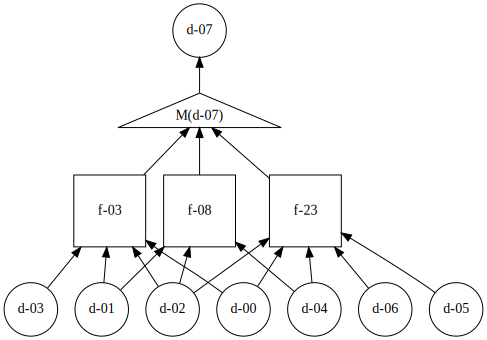

In [16]:
m.show_q_diagram()

# Parallel Composition

In [17]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mi',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,0,0,0,0,0,0,1]))

dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02'])
dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02', 'f-23', 'd-01'])
dict_keys(['I(d-00)', 'd-06', 'd-05', 'd-04', 'd-03', 'd-02', 'f-23', 'd-01', 'f-08'])


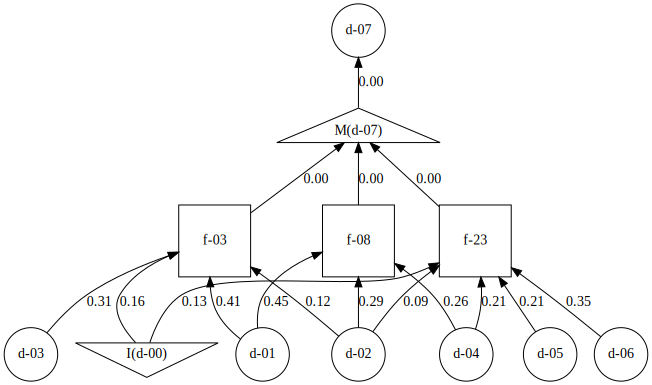

In [18]:
m.show_q_diagram(fi=True)


                We have selected    3 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-03'}, {'f-08'}, {'f-23'}]
                

dict_keys(['d-04', 'I(d-00)', 'd-06', 'd-05', 'd-03', 'd-02', 'd-01'])
dict_keys(['d-04', 'I(d-00)', 'd-06', 'd-05', 'd-03', 'd-02', 'd-01', 'f-23'])
dict_keys(['d-04', 'I(d-00)', 'd-06', 'd-05', 'd-03', 'd-02', 'd-01', 'f-23', 'f-08'])


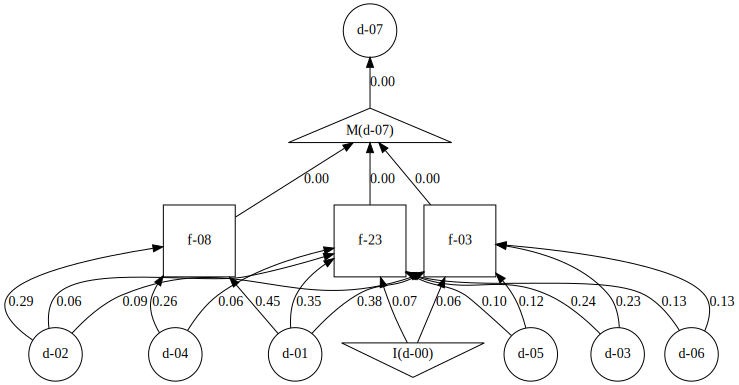

In [27]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='mrai',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=3,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,0,0,0,0,0,0,1]))
m.show_q_diagram(fi=True)

In [25]:
m.selection_algorithm

<function morpheus.algo.selection.random_selection_algorithm(metadata, nb_targets=1, nb_iterations=1, fraction_missing=0.2, nb_desc=None, random_state=997)>

# Sequential Composition


                We have selected    8 model(s) 
                at threshold:       0.90
                with model ids:     [{'f-03'}, {'f-17'}, {'f-52'}, {'f-75'}, {'f-83'}, {'f-119'}, {'f-136'}, {'f-146'}]
                


                We have selected    2 model(s) 
                at threshold:       1.00
                with model ids:     [{'f-43'}, {'f-106'}]
                

AVL DESC: {3, 4, 6}
AVL DESC: {0, 2, 3, 4, 6}
dict_keys(['d-03', 'd-04'])
dict_keys(['d-03', 'd-04', 'f-136', 'I(d-07)', 'd-06'])
dict_keys(['d-03', 'd-04', 'f-136', 'I(d-07)', 'd-06', 'f-83'])
dict_keys(['d-03', 'd-04', 'f-136', 'I(d-07)', 'd-06', 'f-83', 'f-52'])
dict_keys(['d-03', 'd-04', 'f-136', 'I(d-07)', 'd-06', 'f-83', 'f-52', 'f-03', 'M(d-02)'])
dict_keys(['d-03', 'd-04', 'f-136', 'I(d-07)', 'd-06', 'f-83', 'f-52', 'f-03', 'M(d-02)', 'f-106'])


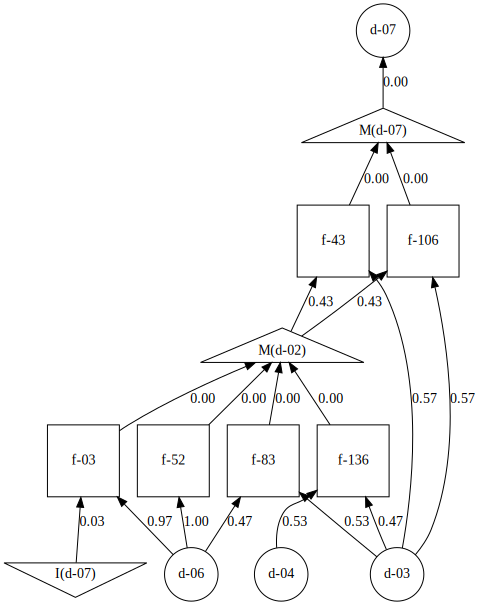

In [20]:
m = Morpheus(random_state=802,
             prediction_algorithm='it',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=20,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)
m.predict(df_test.values, q_code=np.array([-1,-1,-1,0,0,-1,0,1]))
m.show_q_diagram(fi=True)

In [21]:
m = Morpheus(random_state=random_state,
             prediction_algorithm='rw',
             clf_criterion='entropy',
             rgr_criterion='mae',
             selection_algorithm='random',
             nb_iterations=10,
             max_steps=64,
             fraction_missing=0.5,
             max_depth=15,
             regression_max_depth=25)

df_train, df_test = default_dataset()

m.fit(df_train.values)


AVL DESC: {0, 6}
AVL DESC: {0, 4, 6}
AVL DESC: {0, 1, 4, 6}
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06'])
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06', 'f-18', 'd-04'])
dict_keys(['I(d-02)', 'I(d-03)', 'd-00', 'I(d-01)', 'd-06', 'f-18', 'd-04', 'f-62', 'd-01'])


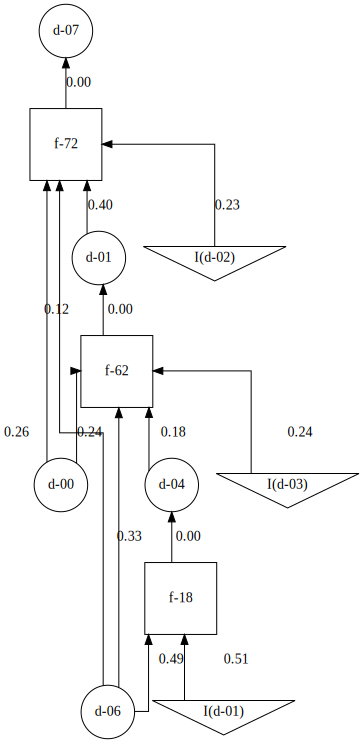

In [22]:
m.predict(df_test.values, q_code=np.array([0,-1,-1,-1,-1,-1,0,1]))
m.show_q_diagram(fi=True, ortho=True)

# Imputation

# Generality

In the previous sections, I have demonstrated the current capa